In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import time

## Symmetric Leaky ReLU
This one melds Leaky ReLU and the tanh functions. The derivatives are simple like in Leaky Relu (just the linear slope in each piecewise section) but the function is symmetric about the origin like tanh.

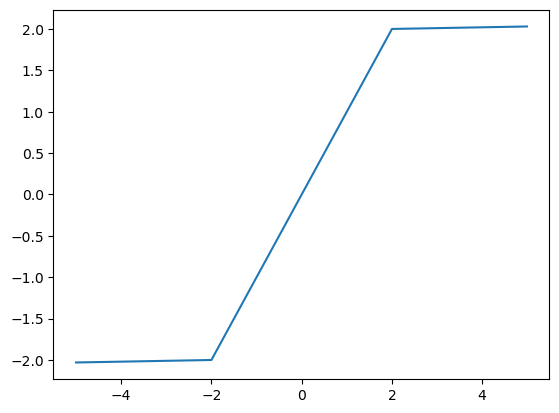

In [13]:
def symmetric_leaky_relu(x, a=1, m=.01):
    y1 = m*(x+a)-a
    y2 = x
    y3 = m*(x-a)+a
    y = torch.where(x<-a, y1, torch.where(x>a, y3,y2))
    return y

x=torch.arange(-5,5,.01)
plt.plot(x, symmetric_leaky_relu(x, 2))
plt.show()

## Symmetric Log
This one is similar to ReLU in that it is not bounded. Unlike ReLU, it is symmetric about the origin and is non-linear everywhere (as opposed to piecwise linear), and outliers have diminishing weight as the logarithm diverges slower than linear. Near the origin the function is approximately linear. Derivatives are also fairly simple. 

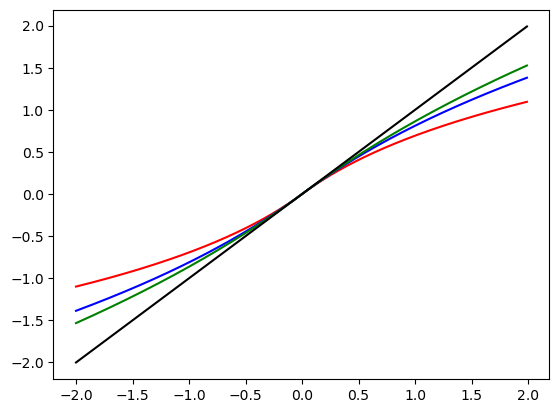

In [27]:
def symmetric_log(x, a=1):
    y1 = -a*torch.log(-x/a+1)
    y2 = a*torch.log(x/a+1)
    y = torch.where(x<0, y1, y2)
    return y

x=torch.arange(-2,2,.01)
plt.plot(x, symmetric_log(x), 'red')
plt.plot(x, symmetric_log(x, 2), 'blue')
plt.plot(x, symmetric_log(x, 3), 'green')
plt.plot(x, x, 'black')
plt.show()